In [67]:
from scipy.integrate import odeint
from scipy.integrate import quad, solve_ivp
from scipy import integrate
import numpy as np
import ZebraLib as zb
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [68]:
Zb = zb.Airplane(name='Avião 2022', b=2.025, S=1.06, Af=0.605, c=0.529, CLmax= 1.47378, 
              Load=5.5, mv=3, CLn=1.021, Nmax=2.1, Swet= 10, Tc=(-2.61671500e-02,  1.68767840e-02,  2.93532946e+01))
              
#df = Zb.info(zb.alt2rho(1212))

c:\Users\arthu\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
c:\Users\arthu\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


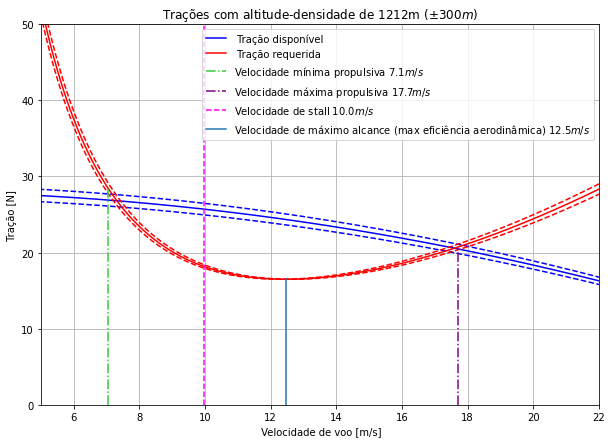

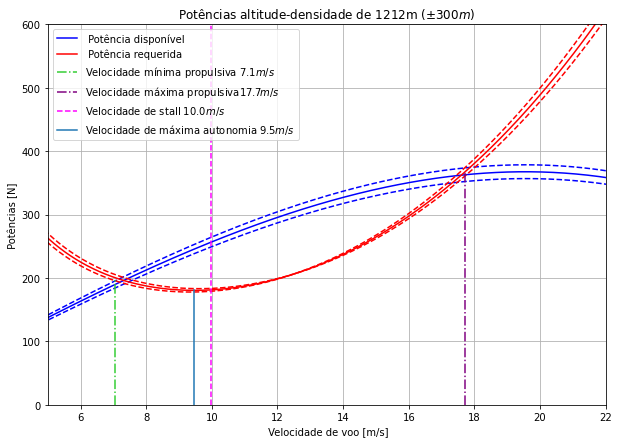

In [69]:
#mais elementos melhor para o método find_match
V = np.linspace(0.1, 35, 1000)
rho = np.array( (1.1212, 1.0886542, 1.05678))

#rho = np.array( (alt2rho(1139), alt2rho(1212), alt2rho(1285)))

Trac_Av0 = Zb.trac_Available(V, rho[0])
Trac_Av1 = Zb.trac_Available(V, rho[1])
Trac_Av2 = Zb.trac_Available(V, rho[2])

Trac_Req0 = Zb.trac_Req(V, rho[0])
Trac_Req1 = Zb.trac_Req(V, rho[1])
Trac_Req2 = Zb.trac_Req(V, rho[2])

pot_Av0 = Zb.pot_Available(V, rho[0])
pot_Av1 = Zb.pot_Available(V, rho[1])
pot_Av2 = Zb.pot_Available(V, rho[2])

pot_Req0 = Zb.pot_Req(V, rho[0])
pot_Req1 = Zb.pot_Req(V, rho[1])
pot_Req2 = Zb.pot_Req(V, rho[2])

# ==========================================     FIGURA 1      ==============================================

fig, ax = plt.subplots(figsize=(10, 7))

ax.set(title=f'Trações com altitude-densidade de {round(zb.alt2rho(rho=rho[1]))}m ($\pm 300 m)$', xlabel=' Velocidade de voo [m/s]',
          ylabel=' Tração [N] ')

ax.plot(V, Trac_Av0, 'b--')
ax.plot(V, Trac_Av1, color= 'b', label= ' Tração disponível ')
ax.plot(V, Trac_Av2, 'b--')

ax.plot(V, Trac_Req0, 'r--')
ax.plot(V, Trac_Req1, color= 'r',label= ' Tração requerida ')
ax.plot(V, Trac_Req2, 'r--')

#Maximos e mínimos de velocidade + velocidade de stall e máx efic aerod
def resid(x, args):
    rho = args
    return Zb.trac_Dif(x, rho)

Vmin_index = zb.get_index_of_nearest_element(V, zb.robustNewton(resid, V.min(), args=rho[0])[0])
Vmax_index = zb.get_index_of_nearest_element(V, zb.robustNewton(resid, V.max(), args=rho[0])[0])

ax.plot([V[Vmin_index]]*2, [0, Trac_Req1[Vmin_index]] , 
        linestyle='dashdot', color='limegreen', 
        label= f'Velocidade mínima propulsiva ${round(V[Vmin_index],1)}m/s$')

ax.plot([V[Vmax_index]]*2,[0, Trac_Req1[Vmax_index]] , 
        linestyle='dashdot', color='purple', 
        label= f'Velocidade máxima propulsiva ${round(V[Vmax_index],1)}m/s$')

ax.plot([Zb.Vstall]*2, [0, 50], linestyle='--',
        color='magenta', label= f'Velocidade de stall ${round(Zb.Vstall,1)}m/s$')

Maxalc_index = np.where(Trac_Req1 == min(Trac_Req1))

ax.plot([V[Maxalc_index]]*2, [0, Trac_Req1[Maxalc_index]], 
        label=f'Velocidade de máximo alcance (max eficiência aerodinâmica) ${round(min(V[Maxalc_index]),1)}m/s$') 
 
ax.set_ylim(0,50)
ax.set_xlim(5,22)

ax.legend()
ax.grid()

# =====================================     FIGURA 2      ==============================================

fig2, ax2 = plt.subplots(figsize=(10, 7))
ax2.set(title=f'Potências altitude-densidade de {round(zb.alt2rho(rho=rho[1]))}m ($\pm 300 m)$', xlabel=' Velocidade de voo [m/s]',
          ylabel=' Potências [N] ')

ax2.plot(V, pot_Av0, 'b--')
ax2.plot(V, pot_Av1, color= 'b', label= ' Potência disponível ')
ax2.plot(V, pot_Av2, 'b--')

ax2.plot(V, pot_Req0, 'r--')
ax2.plot(V, pot_Req1, color= 'r',label= ' Potência requerida ')
ax2.plot(V, pot_Req2, 'r--')

ax2.plot([V[Vmin_index]]*2,[0, pot_Req1[Vmin_index]], 
        linestyle='dashdot', color='limegreen', 
        label= f'Velocidade mínima propulsiva ${round(V[Vmin_index],1)}m/s$')

ax2.plot([V[Vmax_index]]*2, [0, pot_Req1[Vmax_index]], 
        linestyle='dashdot', color='purple',
        label= f'Velocidade máxima propulsiva$ {round(V[Vmax_index],1)}m/s$')

ax2.plot([Zb.Vstall]*2, [0, 1100], linestyle='--', color='magenta', label= f'Velocidade de stall ${round(Zb.Vstall,1)}m/s$')

MaxAuto_index = np.where(pot_Req1 == min(pot_Req1))

ax2.plot([V[MaxAuto_index]]*2, [0, pot_Req1[MaxAuto_index]], 
        label=f'Velocidade de máxima autonomia ${round(min(V[MaxAuto_index]),1)}m/s$') 
 
ax2.set_ylim(0,600)
ax2.set_xlim(5,22)

ax2.legend()
ax2.grid()

fig.savefig(f'red_tração.pdf', bbox_inches='tight', dpi=300)
fig.savefig(f'red_torque.pdf', bbox_inches='tight', dpi=300)

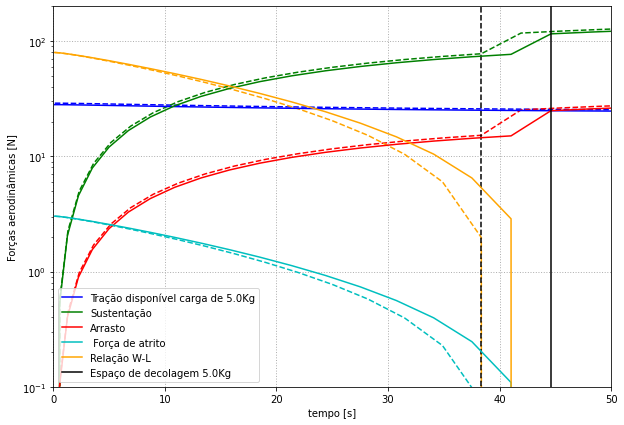

In [70]:
Zb = zb.Airplane(name='Avião 2022', b=2.025, S=1.06, Af=0.605, c=0.529, CLmax= 1.47378, 
              Load=5., mv=3, CLn=1.021, Nmax=2.1, Swet= 10, Tc=(-2.61671500e-02,  1.68767840e-02,  2.93532946e+01))
              
densidade = [zb.alt2rho(912), zb.alt2rho(1212), zb.alt2rho(1512)]   #Densidade do ar desvio de 300m
Markers = ['--', '-', '--']

#PLOTAGEM
fig, ax = plt.subplots(figsize=(10, 7),nrows=1, ncols=1)

#CONSTRUINDO O 1 SUBGRÁFICO   
ax.set(xlabel='tempo [s]',ylabel='Forças aerodinâmicas [N]')

#DENSIDADE 1
#Metodos para dinamica de de colagem
Vlo_index, _V, T, L, D, Fat = Zb.takeOff_Forces(densidade[0])
# Métodos para cinemática de decolagem
t, d, V, a = Zb.takeOff_Kinematic_EDO(rho=densidade[0])
#Plotando os dados para o avião Zb1
ax.plot(d, T, linestyle=Markers[0], color='b')
ax.plot(d, L, linestyle=Markers[0], color= 'g')
ax.plot(d, D, linestyle=Markers[0], color='r')
ax.plot(d, Fat, linestyle=Markers[0], color='c')
ax.plot(d, Fat/Zb.mi, linestyle=Markers[0], color='orange') #Gambiarra para poupar trabalho "Fat/Zb.mi"
ax.plot([d[Vlo_index]]*2, [0,250], linestyle=Markers[0], color='black')

#DENSIDADE 2
#Metodos para dinamica de de colagem
Vlo_index, _V, T, L, D, Fat = Zb.takeOff_Forces(densidade[1])
# Métodos para cinemática de decolagem
t, d, V, a = Zb.takeOff_Kinematic_EDO(rho=densidade[1])
#Plotando os dados para o avião Zb1
ax.plot(d, T, linestyle=Markers[1], color='b', label = f'Tração disponível carga de {Zb.Load}Kg')
ax.plot(d, L, linestyle=Markers[1], color= 'g',label = 'Sustentação')
ax.plot(d, D, linestyle=Markers[1], color='r',label = 'Arrasto')
ax.plot(d, Fat, linestyle=Markers[1], color='c', label = ' Força de atrito ')
ax.plot(d, Fat/Zb.mi, linestyle=Markers[1], color='orange' , label = 'Relação W-L ') #Gambiarra para poupar trabalho "Fat/Zb.mi"
ax.plot([d[Vlo_index]]*2, [0,250], linestyle=Markers[1], color='black' , label = f'Espaço de decolagem {Zb.Load}Kg')

ax.set_ylim(0.1, 200)
ax.set_xlim(0, 50)
ax.set_yscale('log')

ax.legend(loc=3)
ax.grid(linestyle='dotted', linewidth=1)
fig.savefig(f'dinamica_takeoff.pdf', bbox_inches='tight', dpi=300)

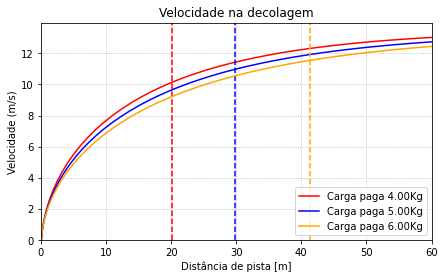

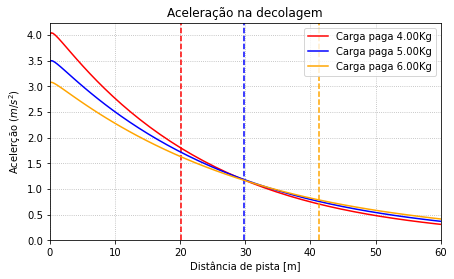

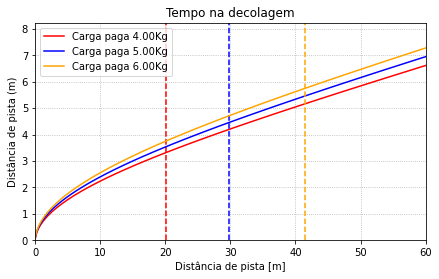

In [71]:
Zb = zb.Airplane(name='Avião 2022', b=2.025, S=1.06, Af=0.605, c=0.529, CLmax= 1.47378, 
              Load=5., mv=3, CLn=1.021, Nmax=2.1, Swet= 10, Tc=(-2.61671500e-02,  1.68767840e-02,  2.93532946e+01))
              
# Definindo domínio
t_final = 8
pesos = np.linspace(4, 6, 3)

# Colores e marcadores (beautilfy)
Cores = np.array(('red', 'blue', 'orange', 'purple', 'limegreen'))
Markers = np.array(('^', 'o', 'd', 'v', '.'))
Lines = np.array(('--', '-', '--', '--'))

# Gráficos
fig, ax = plt.subplots(figsize=(7, 4))
fig2, ax2 = plt.subplots(figsize=(7, 4))
fig3, ax3 = plt.subplots(figsize=(7, 4))

ax.set(title='Velocidade na decolagem',
       xlabel='Distância de pista [m]', ylabel='Velocidade (m/s)')

ax2.set(title='Aceleração na decolagem',
        xlabel='Distância de pista [m]', ylabel='Acelerção $(m/s^2)$')

ax3.set(title='Tempo na decolagem', xlabel='Distância de pista [m]',
        ylabel='Distância de pista (m)')


for (p, cor, mark) in zip(pesos, Cores, Markers):
    
    Zb.Load = p
    Zb.params_Calc

    # Usando os métodos
    #tempo, S_on, V_on, a_on = Zb.takeOff_Kinematic_EDO(t_final, Ground_Effect=True)
    tempo, S_off, V_off, a_off = Zb.takeOff_Kinematic_EDO(t_final)

    Vlo_index = zb.get_index_of_nearest_element(V_off, Zb.veloc_Req(Zb.CLmax)*1.2)
    
    ax.axvline(x=S_off[Vlo_index], linestyle='--', ymin= 0, ymax= 20, color= cor)
    ax2.axvline(x=S_off[Vlo_index], linestyle='--', ymin= 0, ymax= 20, color= cor)
    ax3.axvline(x=S_off[Vlo_index], linestyle='--', ymin= 0, ymax= 20, color= cor)  #Intantes de decolagem
    
    ax.plot(S_off, V_off, color=cor, label=f'Carga paga {p:.2f}Kg')
    ax2.plot(S_off, a_off, color=cor, label=f'Carga paga {p:.2f}Kg')
    ax3.plot(S_off, tempo, color=cor, label=f'Carga paga {p:.2f}Kg')

# Formatar gráfico 4 para escala logaritmica
# ax4.set_yscale('log')
# ax4.set_ylim(0.1)

# Beautilfy
for graf in [ax, ax2, ax3]:
    graf.legend()
    graf.set_xlim(0, 60)
    graf.set_ylim(0)
    graf.grid(linestyle='dotted')
    
ax.legend(loc=4)
fig.savefig(f'cin_takeoff_veloc.pdf', bbox_inches='tight', dpi=300)
fig2.savefig(f'cin_takeoff_acel.pdf', bbox_inches='tight', dpi=300)
fig3.savefig(f'cin_takeoff_tempo.pdf', bbox_inches='tight', dpi=300)

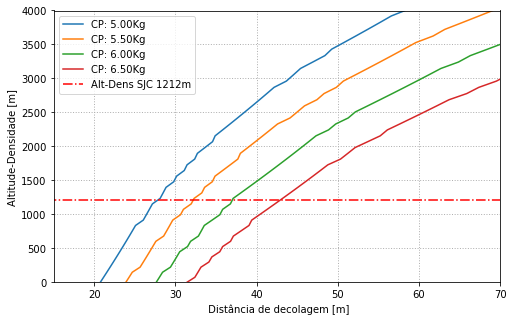

In [72]:
Zb = zb.Airplane(name='Avião 2022', b=2.025, S=1.06, Af=0.605, c=0.529, CLmax= 1.47378, 
              Load=5.5, mv=3, CLn=1.021, Nmax=2.1, Swet= 10, Tc=(-2.61671500e-02,  1.68767840e-02,  2.93532946e+01))
            
Densidade = np.linspace(1.225, 0.8) 
AltDens = zb.iterate_rho2alt(Densidade)
pesos = np.linspace(5, 6.5, 4) 

#PLOTAGEM
fig, ax = plt.subplots(figsize=(8, 5),nrows=1, ncols=1)

#INSPIRADO NA AIRBUS
ax.set(xlabel=' Distância de decolagem [m]',
          ylabel='Altitude-Densidade [m]', label=' - Sem efeito solo e -- com efeito solo')

# Considerando o efeito solo do avião 'True'
for w in pesos:
    Zb.Load = w
    Zb.params_Calc #MT IMPORTANTE ESSE MÉTODO
    S, S2, S3, S4 = np.empty_like(Densidade), np.empty_like(Densidade), np.empty_like(Densidade), np.empty_like(Densidade)
    for i, dens in enumerate(Densidade):
        S[i] =  np.array(Zb.takeOff_Distance_EDO(dens, True))
    ax.plot(S, AltDens, label= f'CP: {Zb.Load:.2f}Kg' )

ax.plot([-5,180], [1212]*2,  linestyle='dashdot', color= 'r', label= 'Alt-Dens SJC 1212m' )
ax.set_ylim(0, 4000)
ax.set_xlim(15,70)
ax.legend()
ax.grid(linestyle='dotted', linewidth=1)

fig.savefig(f'alt_dens_vs_decolagem.pdf', bbox_inches='tight', dpi=300)

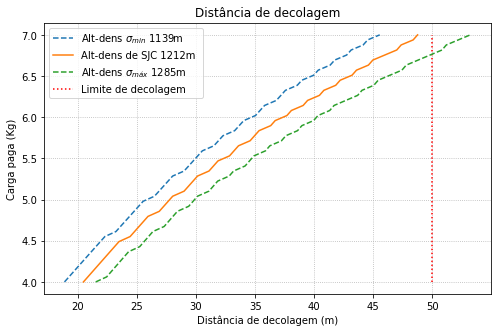

In [73]:
Pesos = np.linspace(4, 7, 50)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set(title='Distância de decolagem', xlabel='Distância de decolagem (m)', ylabel='Carga paga (Kg)')

S1, S2, S3 = np.empty_like(Pesos), np.empty_like(Pesos), np.empty_like(Pesos)
for i, w in enumerate(Pesos):
    Zb.Load = w
    Zb.params_Calc
    S1[i] = Zb.takeOff_Distance_EDO(rho=zb.alt2rho(912))
    S2[i] = Zb.takeOff_Distance_EDO(rho=zb.alt2rho(1212))
    S3[i] = Zb.takeOff_Distance_EDO(rho=zb.alt2rho(1512))
    
ax.plot(S1, Pesos, '--' , label=r'Alt-dens $\sigma_{min}$ 1139m')
ax.plot(S2, Pesos, label=r'Alt-dens de SJC 1212m ')
ax.plot(S3, Pesos, '--', label=r'Alt-dens $\sigma_{máx}$ 1285m')

plt.vlines(50, 4, 7, linestyles = 'dotted', color='red', label='Limite de decolagem')    
ax.legend()
ax.grid(linestyle='dotted')
plt.show()

fig.savefig('cargapaga_vs_decolagem.pdf', bbox_inches='tight', dpi=300)

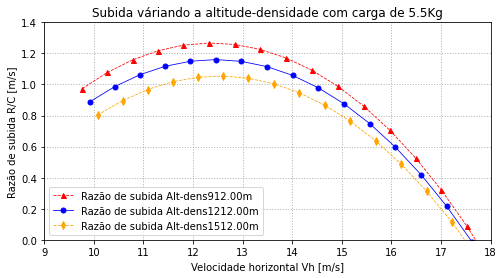

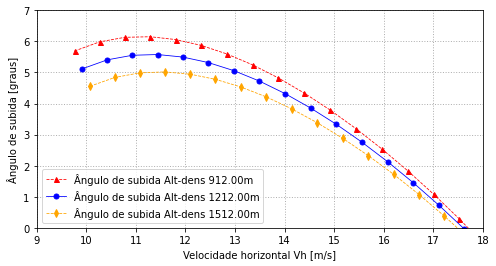

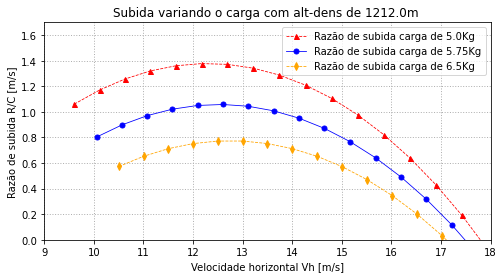

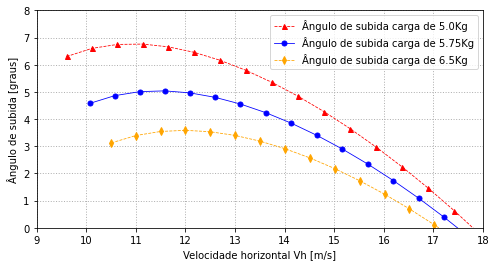

In [74]:
Zb = zb.Airplane(name='Avião 2022', b=2.025, S=1.06, Af=0.605, c=0.529, CLmax= 1.47378, 
              Load=5.5, mv=3, CLn=1.021, Nmax=2.1, Swet= 10, Tc=(-2.61671500e-02,  1.68767840e-02,  2.93532946e+01))
            
V = np.linspace(0, 35)
Pesos = np.linspace(5, 6.5, 3)  

Densidade = [zb.alt2rho(912), zb.alt2rho(1212), zb.alt2rho(1512)]

Cores = np.array(('red', 'blue', 'orange', 'purple', 'limegreen' ))
Markers= np.array(('^', 'o', 'd', 'v', '.'))
Lines = np.array(('--','-','--','--'))

# ===================================              FIGURA 1        ========================================

#SUBIDA VARIANDO A ALTITUDE-DENSIDADE USANDO 5.44kg CARGA PAGA
fig, ax = plt.subplots(figsize=(8, 4))           #Constrói a figura com os subplots
fig, ax2 = plt.subplots(figsize=(8, 4))           #Constrói a figura com os subplots

#SUBGRÁFICO 1 DA FIGURA 1
ax.set(title= f'Subida váriando a altitude-densidade com carga de {Zb.Load}Kg', xlabel='Velocidade horizontal Vh [m/s]',
        ylabel='Razão de subida R/C [m/s]')

#SUBGRÁFICO 2 DA FIGURA 1
ax2.set(xlabel='Velocidade horizontal Vh [m/s]',
        ylabel='Ângulo de subida [graus]')

for (dens, cor, mark, line, w) in zip(Densidade, Cores, Markers, Lines, Pesos):   
    V = np.linspace(Zb.veloc_Req(Zb.CLmax, rho=dens),35)
    RC, theta = Zb.rate_Climb(V, dens)          #Cálcula as razões e os ângulos
    Vh = np.array(np.cos(np.deg2rad(theta))*V)   #Cálcula a velocidade horizontal
    
    ax.plot(Vh, RC, color=cor, marker=mark, linestyle=line, markersize=5, linewidth=0.8, 
            label= f'Razão de subida Alt-dens{zb.alt2rho(rho=dens):.2f}m' )
    ax2.plot(Vh, theta, color=cor, marker=mark, linestyle=line, markersize=5, linewidth=0.8,
             label= f'Ângulo de subida Alt-dens {zb.alt2rho(rho=dens):.2f}m' )

ax.set_ylim(0, 1.4)
ax.set_xlim(9, 18)
ax.legend()
ax.grid(linestyle='dotted', linewidth=1)

ax2.set_ylim(0, 7)
ax2.set_xlim(9, 18)
ax2.legend()
ax2.grid(linestyle='dotted', linewidth=1)

# ===================================             FIGURA 2           ==========================================

#SUBIDA VARIANDO A ALTITUDE-DENSIDADE USANDO 5.44kg CARGA PAGA
fig3, ax = plt.subplots(figsize=(8, 4))            #Constrói a figura com os subplots
fig4, ax2 = plt.subplots(figsize=(8, 4))            #Constrói a figura com os subplots

#SUBGRÁFICO 1 DA FIGURA 1
ax.set(title= f'Subida variando o carga com alt-dens de {round(zb.alt2rho(rho= Densidade[1]),0)}m ',
        xlabel='Velocidade horizontal Vh [m/s]', ylabel='Razão de subida R/C [m/s]')

#SUBGRÁFICO 2 DA FIGURA 1
ax2.set(xlabel='Velocidade horizontal Vh [m/s]',
        ylabel='Ângulo de subida [graus]')

for (cor, mark, line, w) in zip(Cores, Markers, Lines, Pesos):
    Zb.Load = w
    Zb.params_Calc
    
    V = np.linspace(Zb.veloc_Req(Zb.CLmax, rho=zb.alt2rho(1212)),35)
    RC, theta = Zb.rate_Climb(V, zb.alt2rho(1212))          #Cálcula as razões e os ângulos
    Vh = np.array(np.cos(np.deg2rad(theta))*V)           #Cálcula a velocidade horizontal
    
    ax.plot(Vh, RC, color=cor, marker=mark, linestyle=line, markersize=5, linewidth=0.8, 
             label= f'Razão de subida carga de {(Zb.Load)}Kg' )
    ax2.plot(Vh, theta, color=cor, marker=mark, linestyle=line, markersize=5, linewidth=0.8,
             label= f'Ângulo de subida carga de {(Zb.Load)}Kg' )

ax.set_ylim(0, 1.7)
ax.set_xlim(9, 18)
ax.legend()
ax.grid(linestyle='dotted', linewidth=1)

ax2.set_ylim(0, 8)
ax2.set_xlim(9, 18)
ax2.legend()
ax2.grid(linestyle='dotted', linewidth=1)

fig.savefig(f'rz_subida_vs_ati_dens.pdf', bbox_inches='tight', dpi=300)
fig2.savefig(f'ang_subida_vs_carga.pdf', bbox_inches='tight', dpi=300)
fig3.savefig(f'rz_subida_vs_carga.pdf', bbox_inches='tight', dpi=300)
fig4.savefig(f'ang_subida_vs_carga.pdf', bbox_inches='tight', dpi=300)

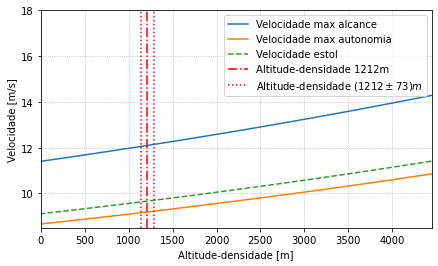

In [75]:
Zb = zb.Airplane(name='Avião 2022', b=2.025, S=1.06, Af=0.605, c=0.529, CLmax= 1.47378, 
              Load=5, mv=3, CLn=1.021, Nmax=2.1, Swet= 10, Tc=(-2.61671500e-02,  1.68767840e-02,  2.93532946e+01))
            
rho = np.linspace(0.3, 1.225)

fig, ax = plt.subplots(figsize=(7, 4))
ax.set(ylabel='Velocidade [m/s]', xlabel='Altitude-densidade [m]')

ax.plot(zb.iterate_rho2alt(rho), Zb.veloc_Req(Zb.Clmax_Alc, rho), label='Velocidade max alcance')
ax.plot(zb.iterate_rho2alt(rho), Zb.veloc_Req(Zb.Clmax_Aut, rho), label='Velocidade max autonomia')
ax.plot(zb.iterate_rho2alt(rho), Zb.veloc_Req(Zb.CLmax, rho),'--',label='Velocidade estol') #precisa corrigir para velocidade de cruzeiro.

ax.axvline(x=1212, color='red', linestyle='dashdot', label='Altitude-densidade 1212m')

ax.axvline(x=1212+73, color='red', linestyle='dotted', label=r'Altitude-densidade $(1212 \pm 73)m$')
ax.axvline(x=1212-73, color='red', linestyle='dotted')

#ax.plot()
ax.set_xlim(0,4450)
ax.set_ylim(8.5,18)
ax.legend()
ax.grid(linestyle='dotted')

fig.savefig(f'cruzeiro.pdf', bbox_inches='tight', dpi=300)


c:\Users\arthu\anaconda3\ZebraLib\zebralib\zebraperformance.py:1453: RuntimeWarning: invalid value encountered in sqrt
  N = (A * (B - C)) ** 0.5
c:\Users\arthu\anaconda3\ZebraLib\zebralib\zebraperformance.py:1545: RuntimeWarning: invalid value encountered in sqrt
  R = V ** 2 / (g * (n ** 2 - 1) ** 0.5)
c:\Users\arthu\anaconda3\ZebraLib\zebralib\zebraperformance.py:1608: RuntimeWarning: invalid value encountered in sqrt
  w = (g * (((n ** 2) - 1) ** 0.5)) / V


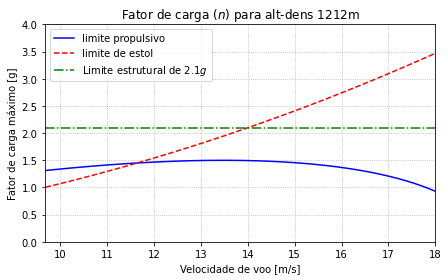

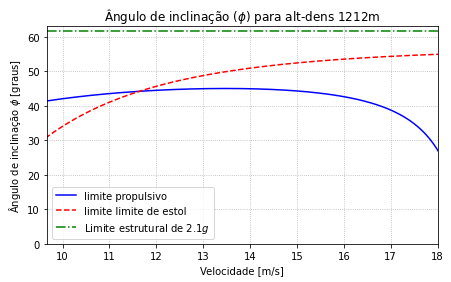

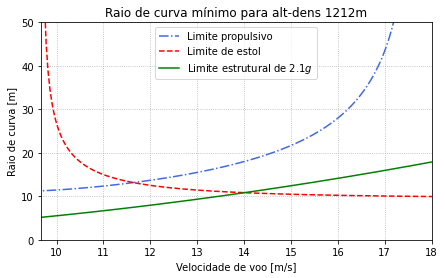

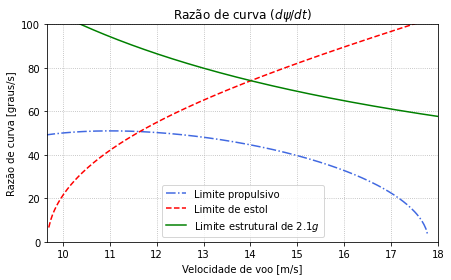

In [76]:
Zb = zb.Airplane(name='Avião 2022', b=2.025, S=1.06, Af=0.605, c=0.529, CLmax= 1.47378, 
              Load=5, mv=3, CLn=1.021, Nmax=2.1, Swet= 10, Tc=(-2.61671500e-02,  1.68767840e-02,  2.93532946e+01))
            
V = np.linspace(0.01, 40, 1000)
dens = 1.0887   # Densidade do ar

Np, phip = Zb.turn_Nprop(V, dens)  # Cálculo dos fatores de carga
Ns, phis= Zb.turn_Nsust(V, dens)

#=========================================       FIGURA 1           ==================================

fig, ax = plt.subplots(figsize=(7, 4 ))
fig2, ax2 = plt.subplots(figsize=(7, 4 ))

#SUBPLOT 1
#Fator de carga durante as curvas
ax.set(title=f'Fator de carga ($n$) para alt-dens {round(zb.alt2rho(rho=dens))}m',
       xlabel='Velocidade de voo [m/s]', ylabel='Fator de carga máximo [g]')

ax.plot(V, Np, color='b', label='limite propulsivo')
ax.plot(V, Ns,'--',  color='red', label='limite de estol')
ax.axhline(y=Zb.Nmax, ls='-.', color='green', label=f'Limite estrutural de ${Zb.Nmax}g$')

ax.set_xlim(Zb.veloc_Req(Zb.CLmax, zb.alt2rho(1212)), 18)
ax.set_ylim(0, 4)
ax.grid(linestyle='dotted')
ax.legend()

#SUBPLOT 2
#Inclinação das asas durante a curva 'phi' 
ax2.set(title= r'Ângulo de inclinação ($\phi$) para alt-dens ' + f'{round(zb.alt2rho(rho=dens))}m',
       xlabel='Velocidade de voo [m/s]', ylabel='Fator de carga máximo [g]')

ax2.set(ylabel=r'Ângulo de inclinação $\phi$ [graus]', xlabel='Velocidade [m/s]')

ax2.plot(V, phip, color='b', label='limite propulsivo')
ax2.plot(V, phis,'--', color='red', label='limite limite de estol')
ax2.axhline(y=np.degrees(np.arccos(1/Zb.Nmax)), ls='-.', color='green', label=f'Limite estrutural de ${Zb.Nmax}g$')

ax2.set_ylim(0)
ax2.set_xlim(Zb.veloc_Req(Zb.CLmax, zb.alt2rho(1212)), 18)
ax2.grid(linestyle='dotted')
ax2.legend()

#=========================================       FIGURA 2            ==================================

#Raio de curva
Rp = Zb.turn_Radius(V, Np)          #Limite propulsivo
Rs = Zb.turn_Radius(V, Ns)          #Limite pelo estol da asa (CL)
Rstr = Zb.turn_Radius(V, Zb.Nmax)   #Limite estrutural de Nmáx 

#Razão de curva
Wp = Zb.turn_Rate(V, Np)            #Limite propulsivo
Ws = Zb.turn_Rate(V, Ns)            #Limite pelo estol da asa (CL)
Wstr = Zb.turn_Rate(V, Zb.Nmax)     #Limite estrutural de Nmáx 

fig3, ax = plt.subplots(figsize=(7, 4 ))
fig4, ax2 = plt.subplots(figsize=(7, 4 ))

#SUBPLOT 1
#Raio de curva 
ax.set(title=f'Raio de curva mínimo para alt-dens {round(zb.alt2rho(rho=dens))}m', 
       ylabel='Raio de curva [m]', xlabel='Velocidade de voo [m/s]')

ax.plot(V, Rp, linestyle='dashdot', color='royalblue', label='Limite propulsivo')
ax.plot(V, Rs, '--', color='red', label='Limite de estol')
ax.plot(V, Rstr, color='green', label=f'Limite estrutural de ${Zb.Nmax}g$')

ax.set_ylim(0, 50)
ax.set_xlim(Zb.veloc_Req(Zb.CLmax, zb.alt2rho(1212)), 18)

ax.grid(linestyle='dotted')
ax.legend()

#SUBPLOT 2
#Razão de curva
ax2.set(title=r'Razão de curva ($d \psi /dt$)',ylabel='Razão de curva [graus/s]'
       , xlabel='Velocidade de voo [m/s]')

ax2.plot(V, Wp, linestyle='dashdot', color='royalblue', label='Limite propulsivo')
ax2.plot(V, Ws, '--', color='red', label='Limite de estol')
ax2.plot(V, Wstr, color='green', label=f'Limite estrutural de ${Zb.Nmax}g$')

ax2.set_ylim(0, 100)
ax2.set_xlim(Zb.veloc_Req(Zb.CLmax, zb.alt2rho(1212)), 18)
ax2.grid(linestyle='dotted')
ax2.legend()

fig.savefig(f'manobra_fator_e_ang.pdf', bbox_inches='tight', dpi=300)
fig2.savefig(f'manobra_raio_e_razao.pdf', bbox_inches='tight', dpi=300)

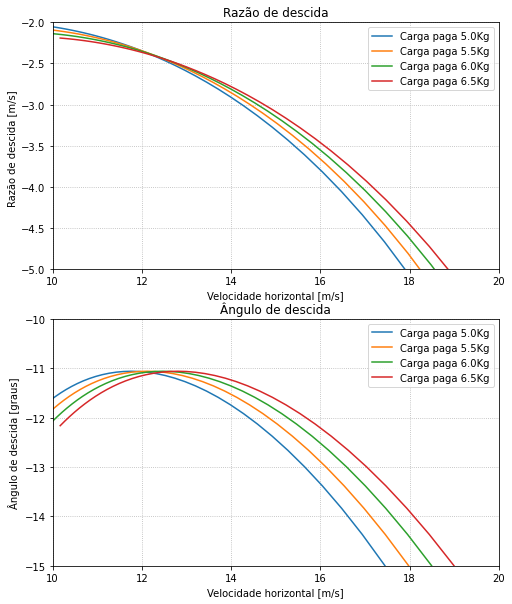

In [77]:
Zb = zb.Airplane(name='Avião 2022', b=2.025, S=1.06, Af=0.605, c=0.529, CLmax= 1.47378, 
              Load=5, mv=3, CLn=1.021, Nmax=2.1, Swet= 10, Tc=(-2.61671500e-02,  1.68767840e-02,  2.93532946e+01))

Cl = np.linspace(0.1, Zb.CLmax)
V = np.linspace(0.1, 20)          
Carga = np.array((5, 5.5, 6, 6.5))

#PLOTAGEM SUBPLOT 1 FIGURA 2
fig, (ax3, ax4) = plt.subplots(figsize=(8, 10),nrows=2, ncols=1)
#fig.suptitle('Descida calculada para o Zb variando a alt-dens')


ax3.set(title='Razão de descida', xlabel='Velocidade horizontal [m/s]'
      , ylabel='Razão de descida [m/s] ')

for w in Carga:
    Zb.Load = w
    Zb.params_Calc
    theta, RS, Vh = Zb.sink_Rate(Cl, zb.alt2rho(1212))
    ax3.plot(Vh, -RS, label= f'Carga paga {w}Kg')

ax3.legend()
ax3.set_xlim(10, 20)
ax3.set_ylim(-5,-2)

ax3.grid(ls='dotted')
#PLOTAGEM SUBPLOT 2 FIGURA 2

ax4.set(title='Ângulo de descida', xlabel='Velocidade horizontal [m/s]'
       , ylabel='Ângulo de descida [graus]')

for w in Carga:
    Zb.Load = w
    Zb.params_Calc
    theta, RS, Vh = Zb.sink_Rate(Cl, zb.alt2rho(1212))
    ax4.plot(Vh, -theta, label= f'Carga paga {w}Kg')
    

ax4.legend()
ax4.set_xlim(10, 20)
ax4.set_ylim(-15, -10)

ax4.grid(ls='dotted')
fig.savefig(f'descida.pdf', bbox_inches='tight', dpi=300)


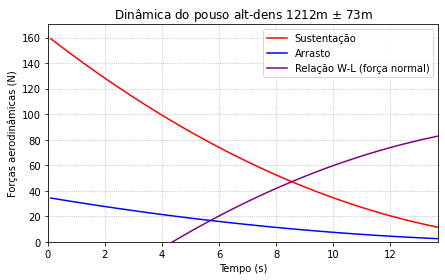

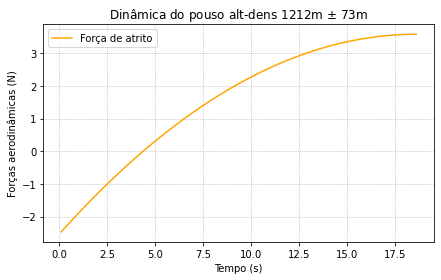

In [78]:
Densidade = np.array((zb.alt2rho(912), zb.alt2rho(1212), zb.alt2rho(1512)))   #Densidade do ar desvio de 300m
Cores = np.array(('red', 'blue', 'orange', 'purple', 'limegreen'))
Markers =  np.array(('--', '-', '--'))

fig, ax = plt.subplots(figsize=(7, 4))
fig2, ax2 = plt.subplots(figsize=(7, 4))

ax.set(title=r'Dinâmica do pouso alt-dens 1212m $\pm$ 73m', xlabel='Tempo (s)', ylabel='Forças aerodinâmicas (N)')
ax2.set(title='Dinâmica do pouso alt-dens 1212m $\pm$ 73m', xlabel='Tempo (s)', ylabel='Forças aerodinâmicas (N)')

Vl, V, L, D, Fat = Zb.Landing_Forces(Densidade[1])
t, d, V, a = Zb.landing_Kinematic_EDO(19, Densidade[1])

ax.plot(t, L, linestyle=Markers[1], color=Cores[0], label='Sustentação')
ax.plot(t, D,  linestyle=Markers[1], color=Cores[1], label='Arrasto')
ax2.plot(t, Fat,  linestyle=Markers[1], color=Cores[2], label='Força de atrito')
ax.plot(t, Fat/Zb.mi,  linestyle=Markers[1], color=Cores[3], label='Relação W-L (força normal)')

ax.set_xlim(0, Vl) #Fica melhor se colocar em escala de logaritmo
ax.set_ylim(0)
ax.legend()
ax.grid(linestyle='dotted')

ax2.legend()
ax2.grid(linestyle='dotted')

fig.savefig(f'dinâmica_pouso.pdf', bbox_inches='tight', dpi=300)
fig2.savefig(f'dinâmica_pouso_atrito.pdf', bbox_inches='tight', dpi=300)



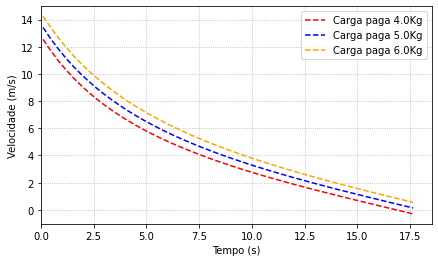

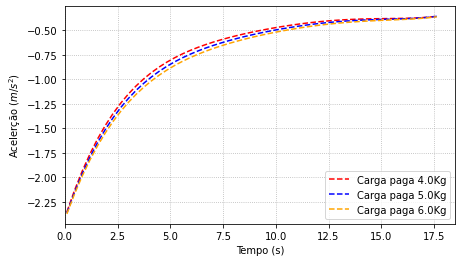

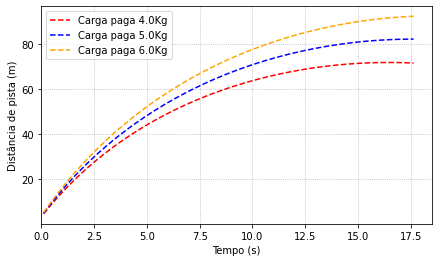

In [79]:

# Definindo domínio
t_final = 18
pesos = np.linspace(4, 6, 3)

# Colores e marcadores (beautilfy)
Cores = np.array(('red', 'blue', 'orange', 'purple', 'limegreen'))
Markers = np.array(('^', 'o', 'd', 'v', '.'))
Lines = np.array(('--', '-', '--', '--'))

# Gráficos
fig, ax = plt.subplots(figsize=(7, 4))
fig2, ax2 = plt.subplots(figsize=(7, 4))
fig3, ax3 = plt.subplots(figsize=(7, 4))

ax.set(xlabel='Tempo (s)', ylabel='Velocidade (m/s)')
ax2.set(xlabel='Tempo (s)',
        ylabel='Acelerção $(m/s^2)$')
ax3.set(xlabel='Tempo (s)',
        ylabel='Distância de pista (m)')

'''ax4.set(title='Cinemática do pouso',
        xlabel='Tempo (s)', ylabel='Valores numéricos')'''

for (p, cor, mark) in zip(pesos, Cores, Markers):
    Zb = zb.Airplane(Load=p)

    Zb.C_D0 = 0.1

    # Usando os métodos
    tempo, S_on, V_on, a_on = Zb.landing_Kinematic_EDO(
        t_final, Ground_Effect=True)
    
    tempo, S_off, V_off, a_off = Zb.landing_Kinematic_EDO(t_final)

    #Vlo_index = get_index_of_nearest_element(V_off, Zb.veloc_Req(Zb.CLmax)*1.2)

    #ax.plot(tempo, V_on, color= cor, label=f'Efeito solo ON: Carga paga {p}Kg')
    ax.plot(tempo, V_off, '--', color=cor,
            label=f'Carga paga {p}Kg')
    #ax.axvline(x=tempo[Vlo_index], ymin= 0, ymax= 20, color= cor)

    #ax2.plot(tempo, a_on, color= cor, label=f'Efeito solo ON: Carga paga {p}Kg')
    ax2.plot(tempo, a_off, '--', color=cor,
             label=f'Carga paga {p}Kg')
    #ax2.axvline(x=tempo[Vlo_index], ymin=0, ymax= 8, color= cor)

    #ax3.plot(tempo, S_on, color= cor, label=f'Efeito solo ON: Carga paga {p}Kg')
    ax3.plot(tempo, S_off, '--', color=cor,
             label=f'Carga paga {p}Kg')
    #ax3.axvline(x=tempo[Vlo_index], ymin= 0, ymax= 50, color= cor)

    '''ax4.plot(tempo, V_off, '--', marker=Markers[0], color=cor,
             label=f'Velocidade, Carga paga {p}Kg')
    ax4.plot(tempo, -a_off, '--', marker=Markers[1], color=cor,
             label=f'Aceleração')
    ax4.plot(tempo, S_off, '--', marker=Markers[2], color=cor,
             label=f'Espaço')'''

# Formatar gráfico 4 para escala logaritmica
#ax4.set_yscale('log')
#ax4.set_ylim(0.3)

# Beautilfy
for graf in [ax, ax2, ax3]:
    graf.legend()
    graf.set_xlim(0)
    graf.grid(linestyle='dotted')
    
fig.savefig(f'cin_pouso_veloc.pdf', bbox_inches='tight', dpi=300)
fig2.savefig(f'cin_pouso_acel.pdf', bbox_inches='tight', dpi=300)
fig3.savefig(f'cin_pouso_dist.pdf', bbox_inches='tight', dpi=300)


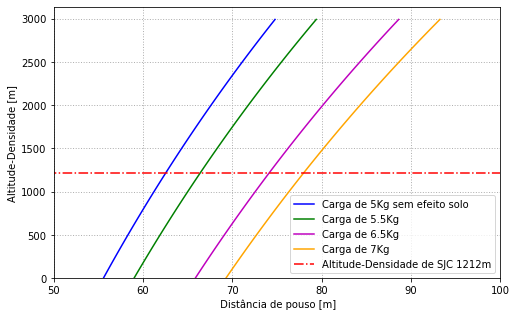

In [80]:
Zb = zb.Airplane(name='Avião 2022', b=2.025, S=1.06, Af=0.605, c=0.529, CLmax= 1.47378, 
              Load=5, mv=3, CLn=1.021, Nmax=2.1, Swet= 10, Tc=(-2.61671500e-02,  1.68767840e-02,  2.93532946e+01))
Zb2 = zb.Airplane(name='Avião 2022', b=2.025, S=1.06, Af=0.605, c=0.529, CLmax= 1.47378, 
              Load=5.5, mv=3, CLn=1.021, Nmax=2.1, Swet= 10, Tc=(-2.61671500e-02,  1.68767840e-02,  2.93532946e+01))
Zb3 = zb.Airplane(name='Avião 2022', b=2.025, S=1.06, Af=0.605, c=0.529, CLmax= 1.47378, 
              Load=6.5, mv=3, CLn=1.021, Nmax=2.1, Swet= 10, Tc=(-2.61671500e-02,  1.68767840e-02,  2.93532946e+01))
Zb4 = zb.Airplane(name='Avião 2022', b=2.025, S=1.06, Af=0.605, c=0.529, CLmax= 1.47378, 
              Load=7, mv=3, CLn=1.021, Nmax=2.1, Swet= 10, Tc=(-2.61671500e-02,  1.68767840e-02,  2.93532946e+01))


Densidade = np.linspace(1.225, 0.91) 
AltDens = zb.iterate_rho2alt(Densidade)

# Sem considerar o efeito solo 'False'
Slo =  np.array(Zb.landing_Distance_Miranda(Densidade, False))
Slo2 = np.array(Zb2.landing_Distance_Miranda(Densidade, False))
Slo3 = np.array(Zb3.landing_Distance_Miranda(Densidade, False))
Slo4 = np.array(Zb4.landing_Distance_Miranda(Densidade, False))

# Considerando o efeito solo do avião 'True'
S =  np.array(Zb.landing_Distance_Miranda(Densidade, True))
S2 = np.array(Zb2.landing_Distance_Miranda(Densidade, True))
S3 = np.array(Zb3.landing_Distance_Miranda(Densidade, True))
S4 = np.array(Zb4.landing_Distance_Miranda(Densidade, True))

#PLOTAGEM
fig, ax = plt.subplots(figsize=(8, 5))

#INSPIRADO NA AIRBUS
ax.set(xlabel=' Distância de pouso [m]',
          ylabel='Altitude-Densidade [m]', label=' - Sem efeito solo e -- com efeito solo')

# Sem considerar o efeito solo 'False'
ax.plot(Slo, AltDens, color= 'b',  label= f'Carga de {round(Zb.Load,2)}Kg sem efeito solo' )
ax.plot(Slo2, AltDens, color='g', label= f'Carga de {round(Zb2.Load,2)}Kg')
ax.plot(Slo3, AltDens, color= 'm', label= f'Carga de {round(Zb3.Load,2)}Kg ')
ax.plot(Slo4, AltDens, color= 'orange', label= f'Carga de {round(Zb4.Load,2)}Kg')

#Considerando o efeito solo do avião 'True'
'''ax.plot(S, AltDens, '--', color= 'b', label= f'Carga de {round(Zb.Load,2)}Kg com efeito solo' )
ax.plot(S2, AltDens, '--', color= 'g', label= f'Carga de {round(Zb2.Load,2)}Kg ')
ax.plot(S3, AltDens, '--', color= 'm', label= f'Carga de {round(Zb3.Load,2)}Kg ')
ax.plot(S4, AltDens, '--', color= 'orange', label= f'Carga de {round(Zb4.Load,2)}Kg ')
'''
ax.plot([-5,180], [1212]*2,  linestyle='dashdot', color= 'r', label= 'Altitude-Densidade de SJC 1212m' )

ax.set_ylim(0)
ax.set_xlim(50, 100)

ax.legend()
ax.grid(linestyle='dotted', linewidth=1)
fig.savefig(f'alt_des_vs_distância_pouso.pdf', bbox_inches='tight', dpi=300)


não convergiu com 200 iterações!
não convergiu com 200 iterações!


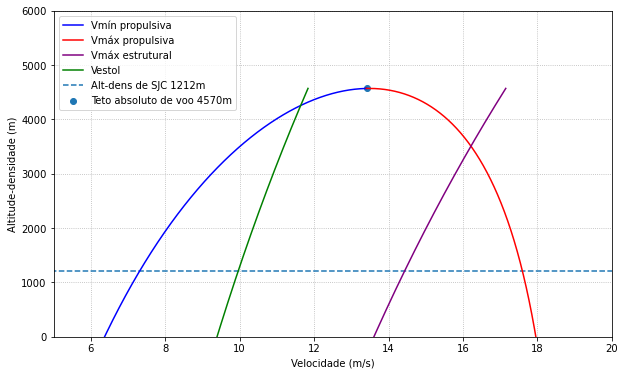

In [81]:
#%matplotlib qt
#%% Plots do envelope
#Avião para ser analisado
Zb = zb.Airplane(name='Avião 2022', b=2.025, S=1.06, Af=0.605, c=0.529, CLmax= 1.47378, 
              Load=5.5, mv=3, CLn=1.021, Nmax=2.1, Swet= 10, Tc=(-2.61671500e-02,  1.68767840e-02,  2.93532946e+01))

#rho= np.linspace(0.96948, 1.225, 10000)
rho= np.linspace(0.771, 1.225, 10000)

V = np.linspace(0.1, 25, 1000)
vmin, vmax, vstall, vstr = Zb.envope_Voo(V, rho) #BadAss


fig, ax = plt.subplots(figsize=(10, 6))

ax.set(xlabel='Velocidade (m/s)', ylabel='Altitude-densidade (m)')
ax.plot(vmin, zb.iterate_rho2alt(rho), color='blue', label='Vmín propulsiva')
ax.plot(vmax, zb.iterate_rho2alt(rho), color='red', label='Vmáx propulsiva')

ax.hlines(1212, 0, 25, linestyle='--', label='Alt-dens de SJC 1212m')
ax.scatter(13.41, 4570, label='Teto absoluto de voo 4570m')
ax.plot(vstr, zb.iterate_rho2alt(rho), color='purple', label='Vmáx estrutural')
ax.plot(vstall, zb.iterate_rho2alt(rho), color='green', label='Vestol')

ax.grid(linestyle='dotted')
ax.set_xlim(5, 20)
ax.set_ylim(0, 6000)
ax.legend()

fig.savefig('envelope.pdf', bbox_inches='tight', dpi=300)